In [46]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

%matplotlib inline
#import csvs
characters = pd.read_csv('simpsons_characters.csv')
episodes = pd.read_csv('simpsons_episodes.csv', na_values = '')
locations = pd.read_csv('simpsons_locations.csv')
#this one is downloaded wrong
script_lines = pd.read_csv('simpsons_script_lines_fixed.csv')

print('characters df', characters.info(), '\n')
print('episodes df', episodes.info(), '\n')
print('locations df', locations.info(), '\n')
print('script_lines df', script_lines.info(), '\n')

print('complete')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6722 entries, 0 to 6721
Data columns (total 4 columns):
id                 6722 non-null int64
name               6722 non-null object
normalized_name    6722 non-null object
gender             323 non-null object
dtypes: int64(1), object(3)
memory usage: 210.1+ KB
characters df None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
id                        600 non-null int64
title                     600 non-null object
original_air_date         600 non-null object
production_code           600 non-null object
season                    600 non-null int64
number_in_season          600 non-null int64
number_in_series          600 non-null int64
us_viewers_in_millions    594 non-null float64
views                     596 non-null float64
imdb_rating               597 non-null float64
imdb_votes                597 non-null float64
image_url                 596 non-null object
video_

/Users/DTrinh/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [47]:
#start by separating out and adding a year column to episodes

year = []
for x in episodes['original_air_date']:
    split = x.split('-')
    year.append(split[0])
    
episodes['year'] = year

print('complete')


complete


complete


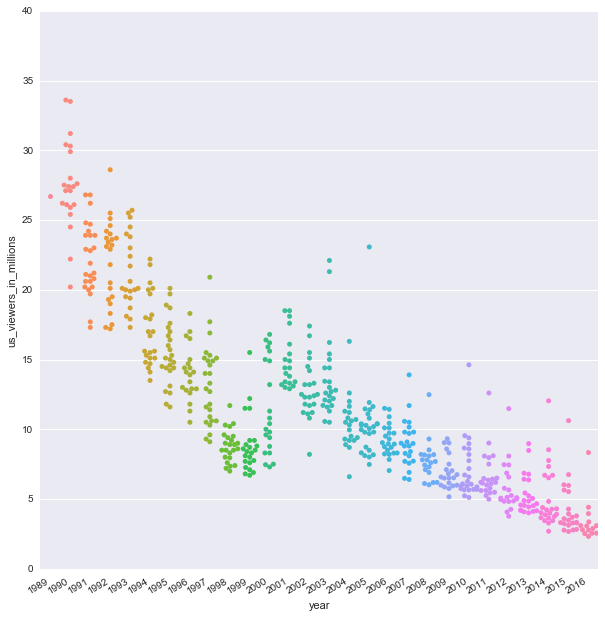

In [48]:
#swarm plot to show views over time
plt.figure(figsize=(10,10))
_ = sns.swarmplot(x = 'year', y = 'us_viewers_in_millions', data = episodes)
_.set_xticklabels(rotation=30, ha='right', labels = np.arange(1989, 2017))
#spike from 2000 - 2001 due to wikipedia switch from household to individual viewship according to data creator todd w. schneider
print('complete')

complete


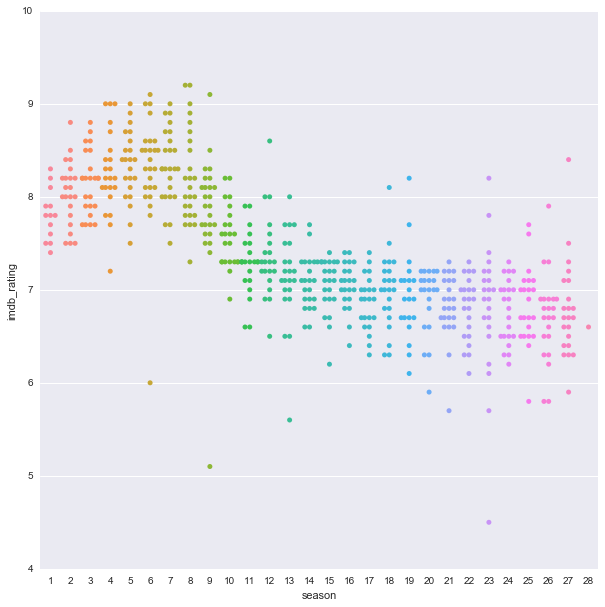

In [49]:
#swarm plot to show imdb rating over time
plt.figure(figsize=(10,10))
_ = sns.swarmplot(x = 'season', y = 'imdb_rating', data = episodes)


print('complete')

In [50]:


character_words = \
                    script_lines[['raw_character_text','raw_location_text', 'word_count']]\
                        .groupby(['raw_location_text','raw_character_text'],
                        as_index = False).agg(['sum','count', 'mean',])

character_words.columns = ['Total Words Spoken', 'Total Lines Spoken', 'Words per Line']


print(character_words.nlargest(10, 'Total Words Spoken'))
test = (character_words.loc['Moe\'s Tavern','Moe Szyslak'])
print(test)

                                                     Total Words Spoken  \
raw_location_text               raw_character_text                        
Simpson Home                    Homer Simpson                   93399.0   
                                Marge Simpson                   57321.0   
                                Lisa Simpson                    33865.0   
                                Bart Simpson                    32403.0   
Moe's Tavern                    Moe Szyslak                     14344.0   
Springfield Elementary School   Seymour Skinner                 11756.0   
Moe's Tavern                    Homer Simpson                    9985.0   
Springfield Nuclear Power Plant Homer Simpson                    8742.0   
                                C. Montgomery Burns              8497.0   
Springfield Elementary School   Bart Simpson                     7117.0   

                                                     Total Lines Spoken  \
raw_location_text       

In [111]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    
    return x, y

def bs_pairs(data1, data2):
    inds = np.arange(len(data1))
    ran_inds = np.random.choice(inds, size = len(inds))
    x, y = data1[ran_inds], data2[ran_inds]
    return x, y
    

593 593


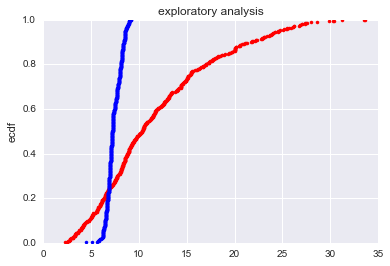

In [123]:
episodes = episodes.dropna()
#episodes = episodes.reset_index(drop = True)

views_df = episodes['us_viewers_in_millions']
imdb_df = episodes['imdb_rating']
views_df.dropna(how = 'any')
views_x, views_y = ecdf(views_df)
imdb_x, imdb_y = ecdf(imdb_df)
print(len(views_df), len(imdb_df))

_ = plt.plot(views_x, views_y, marker= '.', linestyle = 'none', color = 'red')
_ = plt.plot(imdb_x, imdb_y, marker = '.', linestyle = 'none', color = 'blue')
plt.ylabel('ecdf')
plt.title('exploratory analysis')
plt.show()

y =  5.46149581122 * x +  -28.4748219383


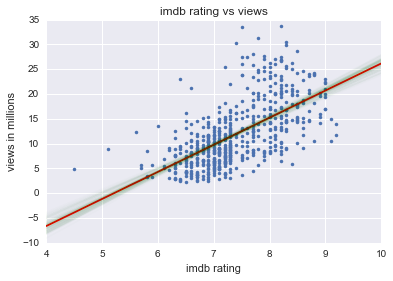

In [115]:
_ = plt.plot(imdb_df, views_df, marker = '.', linestyle = 'none')

m, b = np.polyfit(imdb_df, views_df, 1)
print('y = ',m,'* x + ',b)
x = [4,10]
y = []
for i in x:
    y.append(i*m+b)
_ = plt.plot(x, y, color = 'red')


for n in range(100):
    p = []
    bs_x, bs_y = bs_pairs(imdb_df, views_df)
    a, c = np.polyfit(bs_x, bs_y, 1)
    for i in x:
        p.append(i*a+c)
    _ = plt.plot(x, p, color = 'green', alpha = 0.01)
    
plt.xlabel('imdb rating')
plt.ylabel('views in millions')
plt.title('imdb rating vs views')
plt.show()

In [124]:
r = np.corrcoef(imdb_df, views_df)[0,1]
print(r)
r_bs = []
for n in range(100):
    x, y = bs_pairs(imdb_df, views_df)
    r_bs.append(np.corrcoef(x, y)[0,1])
print(np.percentile(r_bs, (2.5, 97.5)))
    

0.622831938529
[ 0.57870712  0.66348026]
